# Bell State Entanglement

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), construct a Bell State circuit and simulate using the Aer simulator. Visualize the results in a histogram."

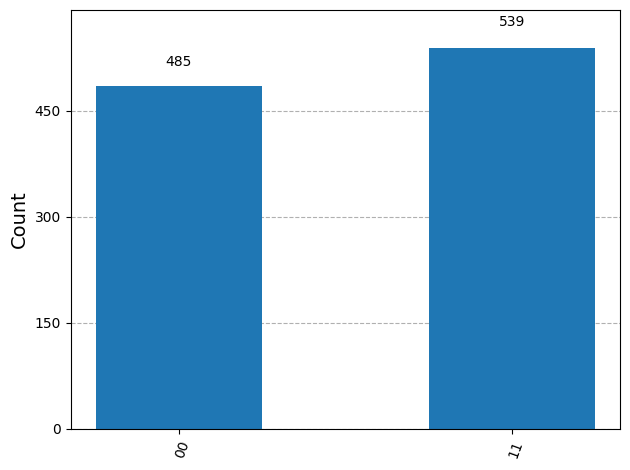

In [1]:
# Import necessary components from Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Step 1: Create a Quantum Circuit
# We create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard gate on the first qubit
qc.h(0)

# Step 3: Apply CNOT gate with the first qubit as control and second qubit as target
qc.cx(0, 1)

# Step 4: Measure the qubits
qc.measure([0, 1], [0, 1])

# Initializing the AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Step 5: Execute the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Step 6: Get the counts (result) of the outcomes
counts = result.get_counts()

# Step 7: Plot the histogram of counts to visualize the results
plot_histogram(counts)


# Quantum Teleportation

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), simulate quantum teleportation between Alice and Bob using the Aer simulator. Visualize the results in a histogram."

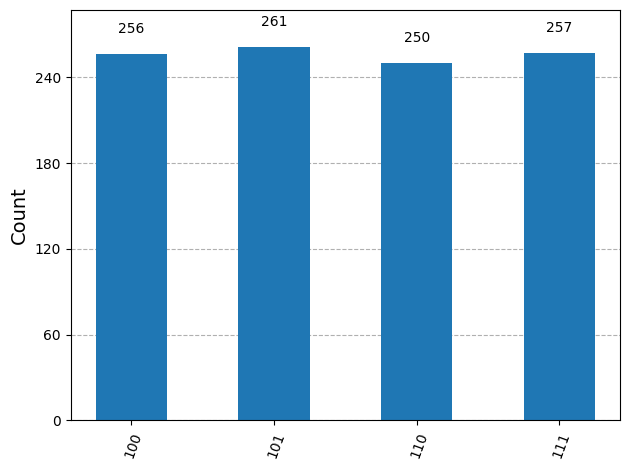

In [2]:
# Import the necessary components from Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Step 1: Create the quantum circuit
# We'll need 3 qubits and 3 classical bits (one set for Alice, one for Bob, and one for the message)
qc = QuantumCircuit(3, 3)

# Prepare the initial state to teleport (e.g., |1>)
qc.x(0)  # Applying an X gate to qubit 0, which we want to teleport
qc.barrier()

# Step 2: Create the entanglement between qubit 1 and qubit 2 (Alice and Bob)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 3: Perform the Bell-state measurement on the qubits 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step 4: Measure the qubits that were part of the Bell-state measurement
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1 into the classical bits 0 and 1

# Step 5: Conditionally apply the X and Z gates to the qubit 2 (Bob's qubit)
qc.cx(1, 2)
qc.cz(0, 2)

# Measure the result on Bob's end
qc.measure(2, 2)

# Setting up the AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Execute the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Get the counts of the outcomes
counts = result.get_counts()

# Display the histogram of the counts
plot_histogram(counts)


# Grover's Algorithm

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), simulate Grover's algorithm, amplifying the marked state $\vert11\rangle$. Use the Aer simulator and visualize the results in a histogram."

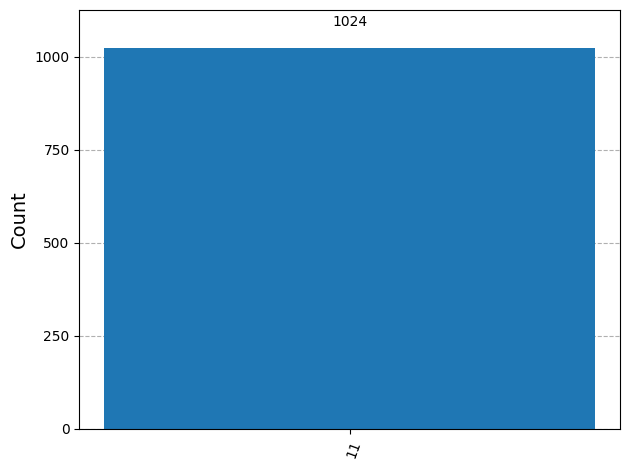

In [3]:
# Import necessary parts of Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Step 1: Create a 2-qubit Quantum Circuit with 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Step 2: Initialize the state to superposition
qc.h([0, 1])

# Oracle for marking the |11> state
qc.cz(0, 1)  # The CZ gate marks the |11> state by adding a phase of -1

# Amplification step:
qc.h([0, 1])
qc.z([0, 1])
qc.cz(0, 1)  # Apply CZ to re-phase the |11> state
qc.h([0, 1])

# Measurement
qc.measure([0, 1], [0, 1])

# Set up the AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Execute the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Get the counts of the outcomes
counts = result.get_counts()

# Plot the histogram of the counts
plot_histogram(counts)


# Inverse Quantum Fourier Transform

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), simulate the inverse quantum fourier transform algorithm using three qubits. Use the Aer simulator and visualize the results in a histogram."

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_42286/2458598149.py:10: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  inverse_qft = QFT(3).inverse()


Measurement Results: {'011': 118, '111': 110, '000': 138, '010': 140, '101': 127, '100': 134, '001': 124, '110': 133}


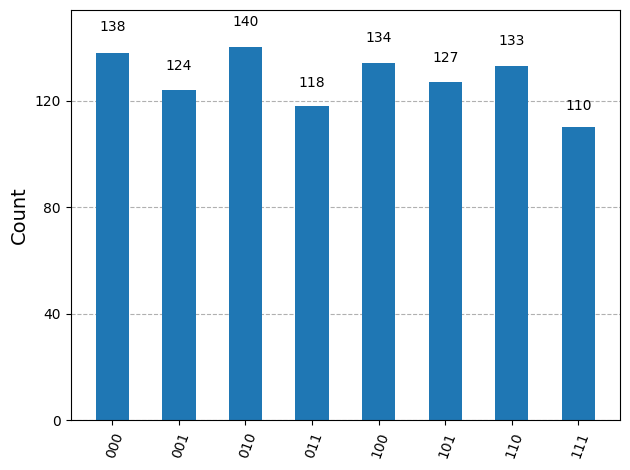

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

# Initialize the Quantum Circuit for 3 qubits
qc = QuantumCircuit(3)

# Add the inverse QFT operation to your circuit
inverse_qft = QFT(3).inverse()
qc.append(inverse_qft, [0, 1, 2])

# Measurement (for histogram visualization)
qc.measure_all()

# Initialize the AerSimulator
simulator = AerSimulator()

# Transpile the Quantum Circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Execute the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Retrieve and print the results of the simulation
counts = result.get_counts()
print(f"Measurement Results: {counts}")

# Visualize the results in a histogram
plot_histogram(counts)

# In Jupyter Notebooks or IPython environments, use display() if necessary.
# display(plot_histogram(counts))


# Bernstein-Vazirani Algorithm

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), simulate the Bernstein-Vazirani algorithm using the secret string '1011'. Use the Aer simulator and visualize the results in a histogram."

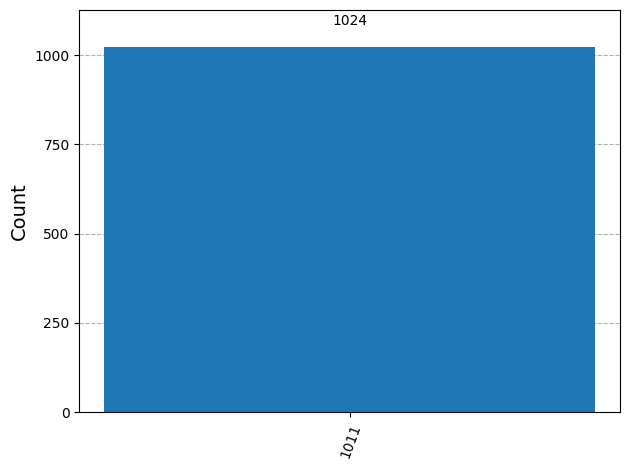

In [32]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Define the secret string
s = '1011'
n = len(s)

# Create the quantum circuit
qc = QuantumCircuit(n+1, n)

# Apply Hadamard gates before the oracle
qc.h(range(n))
# Prepare the ancilla qubit
qc.x(n)
qc.h(n)

# Oracle: Apply CX for each bit in s that is 1
for idx, bit in enumerate(reversed(s)):
    if bit == '1':
        qc.cx(idx, n)

# Apply Hadamard gates after the oracle
qc.h(range(n))

# Measure the first n qubits
qc.measure(range(n), range(n))

simulator = AerSimulator()  # Instantiate the simulator
transpiled_qc = transpile(qc, simulator)  # Transpile the circuit for the simulator
result = simulator.run(transpiled_qc, shots=1024).result()  # Run the simulation
counts = result.get_counts()  # Get the measurement counts

plot_histogram(counts)


# Quantum Phase Estimation

### Prompt

"Using the latest version/documentation of Qiskit (updated 2025), simulate quantum phase estimation with four qubits (3 for QPE, 1 for the eigenstate) using the Aer simulator. Visualize the results in a histogram."

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_67533/2533219114.py:22: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_inv = QFT(3).inverse()


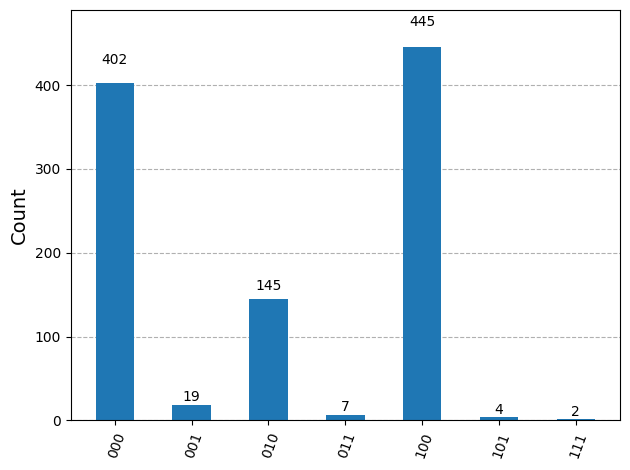

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_42286/4068371126.py:25: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(num_qubits=phase_qubits).inverse()


In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 4 qubits (3 for QPE, 1 for the eigenstate)
qc = QuantumCircuit(4, 3)  # The second argument specifies 3 classical bits for measurement

# Initialize the eigenstate to |1>
qc.x(3)  # The last qubit is qubit 3

# Apply Hadamard gates to the QPE qubits
qc.h([0, 1, 2])

# Apply the controlled unitary operations, using np.pi for π
angles = [2**(-i) * np.pi for i in range(1, 4)]  # Corresponds to a phase of π/4
for qubit in range(3):
    qc.cp(angles[qubit], qubit, 3)

# Apply inverse QFT
qft_inv = QFT(3).inverse()
qc.append(qft_inv, [0, 1, 2])

# Measure the QPE qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Instantiate the Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Run the simulation
result = simulator.run(transpiled_qc, shots=1024).result()

# Retrieve the measurement results
counts = result.get_counts()

# Display the histogram of the results
plot_histogram(counts)


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Step 1: Create Quantum Circuit
qc = QuantumCircuit(3, 3)  # 3 qubits, 3 classical bits

# Prepare an arbitrary state for qubit 0 (Alice's qubit)
qc.h(0)  # Applying a Hadamard gate for example state preparation
qc.barrier()

# Step 2: Create Entanglement between qubits 1 and 2
qc.h(1)  # Hadamard on qubit 1
qc.cx(1, 2)  # CNOT with qubit 1 as control and qubit 2 as target
qc.barrier()

# Step 3: Teleportation Protocol
# Alice operations
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measure qubits 0 and 1
qc.measure(0, 0)  # Measure qubit 0 into classical bit 0
qc.measure(1, 1)  # Measure qubit 1 into classical bit 1

# Bob's operation, conditioned on the classical bits
qc.x(2).c_if(1, 1)  # Apply X if classical bit 1 is 1
qc.z(2).c_if(0, 1)  # Apply Z if classical bit 0 is 1

# Step 4: Simulate the Circuit
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Step 5: Visualize the Results
plot_histogram(counts)


AttributeError: 'InstructionSet' object has no attribute 'c_if'